# Logistic regression

## Calculating probs for luckybag

### Preparing data

In [3]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

### 왜 bracket을 두 개 써야 하는가?

### 기본적으로, DataFrame의 indexing은 특정 column만 가능,
### 그러나 DataFrame에서는 리스트로 인덱싱이 가능하도록 확장된 것임.

In [6]:
fish['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [7]:
fish[['Weight', 'Length']]

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
...,...,...
154,12.2,12.2
155,13.4,12.4
156,12.2,13.0
157,19.7,14.3


In [8]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


### 아래는 하나니까 가능!

In [9]:
fish_target = fish['Species'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### Scaling이 잘 되었는가?

In [12]:
pd.DataFrame(train_scaled).describe()

,0,1,2,3,4
count,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,-2.248435e-16,-7.813544e-18,-4.051381e-16,-7.277092e-16,7.598963e-16
std,1.004228e+00,1.004228e+00,1.004228e+00,1.004228e+00,1.004228e+00
min,-1.106964e+00,-1.883261e+00,-1.951690e+00,-1.701598e+00,-2.011547e+00
25%,-7.691939e-01,-7.025120e-01,-7.226413e-01,-7.205193e-01,-5.977466e-01
50%,-2.906859e-01,-9.339528e-02,-1.102885e-01,-2.920133e-01,-7.667705e-02
75%,6.804038e-01,6.562869e-01,7.192107e-01,6.822007e-01,7.694209e-01
max,3.537378e+00,3.270803e+00,3.190337e+00,2.442750e+00,2.040518e+00


### k-최근접 이웃 분류기의 확률 예측

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [16]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [17]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

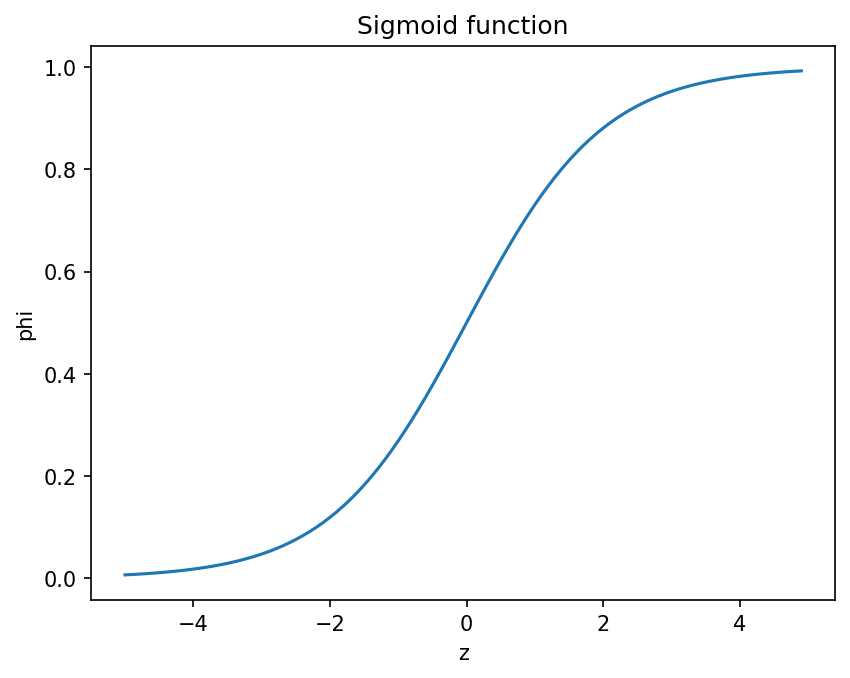

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.title('Sigmoid function')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [19]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [20]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [24]:
print(lr.classes_)

['Bream' 'Smelt']


In [25]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [26]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [27]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [28]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [31]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [32]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [33]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [34]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [35]:
print(np.round(lr.predict_proba(test_scaled[:5]), decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## Important!
1. Logistic function
- Strictly, logistic function is a part of sigmoid (i.e., S-shaped) function
    - Logistic function, Hyperbolic tangent, Arctan, Error function, ...
- $\mathbb{R} \rightarrow (0, 1)$
- ${\displaystyle \phi = \frac{1}{1+e^{-z}}}$
- ${\displaystyle \phi' = \phi(1-\phi)}$
![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*JHWL_71qml0kP_Imyx4zBg.png)
2. Softmax function
- Softmax function converts a vector of $K$ real numbers into a probability distribution of $K$ possible outcomes.
- It is a vector-to-vector function
- ${\displaystyle \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}\ \ {\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}.}$
- $\mathbb{R}^K \rightarrow (0, 1)^K$